In [1]:
from IPython.display import Image

In some time while waiting for a Inode to come up on zen to do some more work on the CAK driving stuff I've been looking into octree data structures.

If we assume that the stucture of the tree does not change frequently (and the current models of core collapse dont update the grid at all) then large increases in memory usage and speed of lookups can be gained by using linearized octrees

In these the nodes are given unique id codes based on their position within the heirarcy, with one bit representing left or right in each dimension, chained together from root (most significant bits) for branch (least significant)

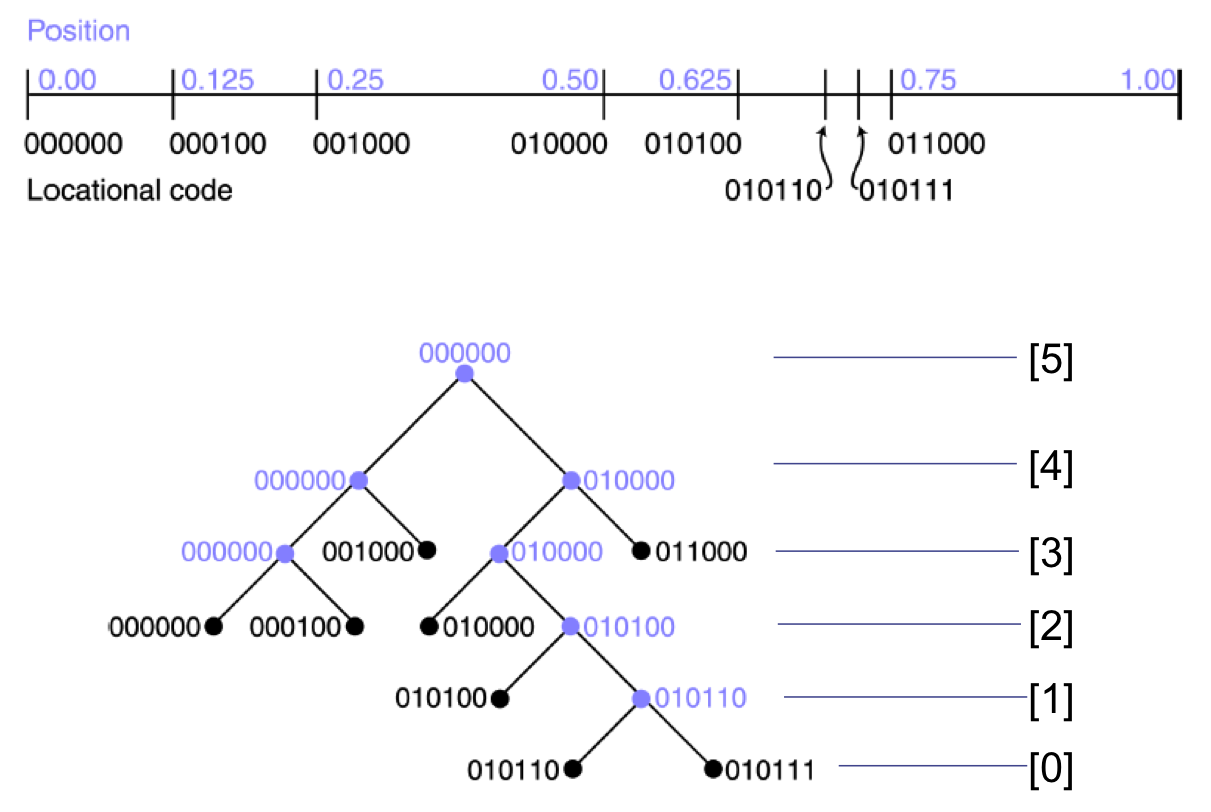

In [4]:
Image(filename='levels.png')

These codes allow look ups for neighbors to be a simple integer operation then a binary search on these codes rather than recursive functions traversing the grid

Frisken & Perry (2002):

Neighbor searching finds a cell in a specified direction (e.g., left, top, top-left, etc.) that touches a given 
cell. Several variations exist, including finding vertex, or edge, (or face, etc.) neighbors, finding neighbors 
of the same size or larger than the given cell, or finding all of the leaf cell neighbors of the given cell.  
In order to determine neighbors of a given cell, we first note that the bit patterns of the locational codes 
of two neighboring cells differ by the binary distance between the two cells. For example, we know that the 
left boundary of every right neighbor of a cell (including intermediate and leaf cells) is offset from the 
cell’s left boundary by the size of the cell. Hence, the x locational code of every right neighbor of a cell can 
be determined by adding the binary form of the cell’s size to the cell’s x locational code. Fortunately, the 
binary form of a cell’s size is easily determined from its level, i.e., 
$${\rm cellSize} ≡ {\rm binary}(2^{\rm cellLevel})$$ 
Hence, the x locational code for a cell’s right neighbor is the sum of the cell’s x locational code and cellSize.

As an example, the cell 
[0.25,0.5) of the bi-tree in the figure has locational code 001000 and level 3. Hence, the x locational code of a neighbor touching its right boundary is $$001000 + {\rm binary}(2^3) =001000 + 001000 = 010000 $$
 which can be verified by inspection.  

Determining the x locational codes of a cell’s left neighbors is more complicated. Because we don’t 
know the sizes of the cell’s left neighbors, we don’t know the correct binary offset between the cell’s x 
locational code and the x locational codes of its left neighbors. However, we first observe that the smallest 
possible left neighbor has level 0 and hence the difference between the x locational code of a cell and the x 
locational code of the cell’s smallest possible left neighbor is 
binary(2<sup>0</sup>) (i.e., smallest possible left neighbor’s x locational code = cell’s x locational code – binary(1)). 

Second, we observe that the left boundary of this smallest possible left neighbor is located between the left and right boundaries of every left neighbor of the cell (including intermediate cells). Hence, a cell’s left neighbors can be located by traversing the tree downward from the root cell using the x locational code of this smallest possible left neighbor and stopping when a neighbor cell of a specified level is reached or a leaf cell is encountered. 


For quadtrees (octrees, etc.), a neighbor is located by following the branching patterns of the pair 
(triplet, etc.) of x, y, (z, etc.) locational codes to the neighbor until a leaf cell is encountered or a specified 
maximum tree traversal level is reached. Each of these locational codes is determined from the appropriate 
cell boundary (which is determined from the specified direction to the neighbor). In a quadtree, the x 
locational code of a right edge neighbor is determined from the cell’s right boundary and the x and y 
locational codes of a top-right vertex neighbor are determined from the cell’s top and right boundaries.  
For example, the right edge neighbor of size greater than or equal to a cell is located by traversing 
downward from the root cell using the x locational code of the cell’s right boundary and the y locational 
code of the cell until either a leaf cell or a cell of the same level as the given cell is reached. As a second 
example, a cell’s bottom-left leaf cell vertex neighbor is located by traversing the tree using the x locational 
code of the cell’s smallest possible left neighbor and the y locational code of the cell’s smallest possible 
bottom neighbor until a leaf cell is encountered. 


Once the locational codes of the desired neighbor have been determined, the desired neighbor can be 
found by traversing the tree downward from the root cell. However, as described in [Samet 90b], it can be 
more efficient to first traverse the tree upward from the given cell to the smallest common ancestor of the 
cell and its neighbor and then traverse the tree downward to the neighbor. Fortunately, locational codes also 
provide an efficient means for determining this smallest common ancestor. Assuming a bi-tree, the 
neighbor’s locational code is determined, as described above, from the given cell’s locational code and the 
specified direction to the neighbor. The given cell’s locational code is then 
XOR’ed with the neighbor’s locational code to generate a difference code. The bi-tree is then traversed upward from the given cell to the first level where the corresponding bit in the difference code is a 0 bit. This 0 bit indicates the smallest level in the bi-tree where the two locational codes are the same. The cell reached by traversing upward to this level is the smallest common ancestor. 


In quadtrees (octrees, etc.), the 2 (3, etc.) locational codes of the given cell are 
XOR’ed with the corresponding locational codes of the neighbor to produce 2 (3, etc.) difference codes. The cell with the highest level reached by the upward traversal for each of these difference codes is the smallest common 
ancestor. 